In [ ]:
#very, VERY quick code to parse energy level data for neutral hydrogen atom

In [1]:
import requests

url = "https://sohoftp.nascom.nasa.gov/solarsoft/packages/chianti/dbase/h/h_1/h_1.elvlc"

page_text = requests.get(url).text

final = ' '.join(page_text.split()).split(' ')

index = 0
energies = dict()
while(int(final[index]) != -1):
    if final[index+1][1] not in energies:
        energies[final[index+1][1]] = []
    energies[final[index+1][1]].append(float(final[index+5]) / 8065.5442)
    index += 7


In [2]:
import plotly.graph_objects as go
fig = go.Figure()

#Counter to start counting levels from (for example, to start at 2s and 3d instead of 1p and 1d)
#I didn't filter points that are too close, so when hovering, level names won't "look" quite right. Zoom in.
counter = 0

for key, value in energies.items():
    counter += 1
    fig.add_trace(go.Scatter(
        x=list(key * len(value)),
        y=value, 
        mode='markers',
        marker_symbol='line-ew-open', marker_line_width=2, marker_size=80,
        name = key[0] + ' column, total: ' + str(len(value)) + ' levels',
        customdata = list(range(counter, len(value) + counter, 1)),
        hovertemplate = '%{customdata}%{x}<extra></extra>',
    ))
    
fig.update_layout(title="Energy levels of H I (neutral hydrogen)",
                  yaxis_title="Energy (in eV)",
                  xaxis_showticklabels=False,
                  title_x=0.5,
                  title_y=0.9,
                 )

fig.show(renderer="notebook_connected")

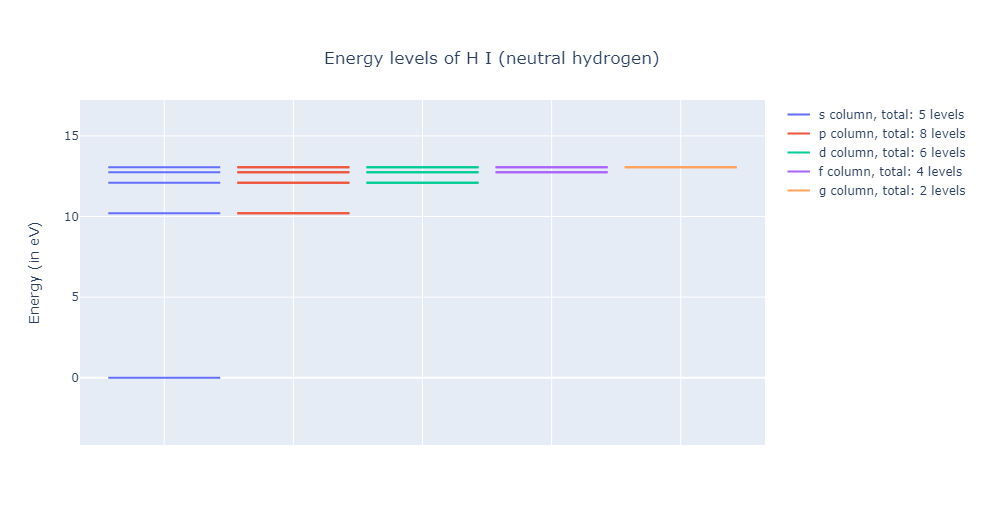